In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(42)

In [3]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

In [4]:
xx

array([[-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       ...,
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ]])

In [5]:
yy

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.97995992, -4.97995992, -4.97995992, ..., -4.97995992,
        -4.97995992, -4.97995992],
       [-4.95991984, -4.95991984, -4.95991984, ..., -4.95991984,
        -4.95991984, -4.95991984],
       ...,
       [ 4.95991984,  4.95991984,  4.95991984, ...,  4.95991984,
         4.95991984,  4.95991984],
       [ 4.97995992,  4.97995992,  4.97995992, ...,  4.97995992,
         4.97995992,  4.97995992],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

In [6]:
# Generate normal training observation

X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X+2, X-2]

In [7]:
X

array([[ 0.14901425, -0.04147929],
       [ 0.19430656,  0.45690896],
       [-0.07024601, -0.07024109],
       [ 0.47376384,  0.23023042],
       [-0.14084232,  0.16276801],
       [-0.13902531, -0.13971893],
       [ 0.07258868, -0.57398407],
       [-0.51747535, -0.16868626],
       [-0.30384934,  0.0942742 ],
       [-0.27240722, -0.42369111],
       [ 0.43969463, -0.06773289],
       [ 0.02025846, -0.42742446],
       [-0.16331482,  0.03327678],
       [-0.34529807,  0.11270941],
       [-0.18019161, -0.08750812],
       [-0.18051198,  0.55568346],
       [-0.00404917, -0.31731328],
       [ 0.24676347, -0.36625309],
       [ 0.06265908, -0.58790104],
       [-0.39845581,  0.05905837],
       [ 0.22153997,  0.05141048],
       [-0.03469448, -0.09033111],
       [-0.4435566 , -0.21595326],
       [-0.13819163,  0.31713667],
       [ 0.10308549, -0.52891205],
       [ 0.09722519, -0.11552468],
       [-0.2030766 ,  0.18350289],
       [ 0.30929986,  0.27938404],
       [-0.25176526,

In [8]:
X_train

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [9]:
# Generate new normal observations

X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X+2, X-2]

In [10]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [12]:
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)

LocalOutlierFactor(contamination=0.1, novelty=True)

In [13]:
# Do not use predict, decision function and score samples on X_train

y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [14]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/var/folders/v1/mhc8zqfd0zj8p68nr82txff80000gn/T/ipykernel_1984/3226618001.py:2: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(xx, yy, Z, level=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
/var/folders/v1/mhc8zqfd0zj8p68nr82txff80000gn/T/ipykernel_1984/3226618001.py:4: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(xx, yy, Z, levels=[0, Z.max()], color='palevioletred')


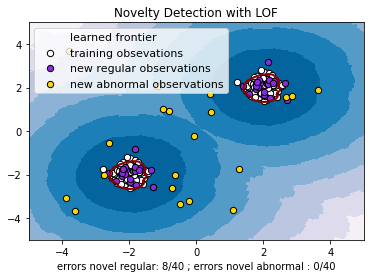

In [17]:
plt.title("Novelty Detection with LOF")
plt.contourf(xx, yy, Z, level=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], color='palevioletred')

s= 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training obsevations", "new regular observations",
            "new abnormal observations"], loc="upper left", prop=matplotlib.font_manager.FontProperties(size=11))

plt.xlabel("errors novel regular: %d/40 ; errors novel abnormal : %d/40" % (n_error_test, n_error_outliers))
plt.show()